<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualizing-linear-relationships" data-toc-modified-id="Visualizing-linear-relationships-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualizing linear relationships</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Functions-to-draw-linear-regression-models" data-toc-modified-id="Functions-to-draw-linear-regression-models-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Functions to draw linear regression models</a></span></li><li><span><a href="#Fitting-different-kinds-of-models" data-toc-modified-id="Fitting-different-kinds-of-models-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Fitting different kinds of models</a></span></li><li><span><a href="#Conditioning-on-other-variables" data-toc-modified-id="Conditioning-on-other-variables-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Conditioning on other variables</a></span></li><li><span><a href="#Controlling-the-size-and-shape-of-the-plot" data-toc-modified-id="Controlling-the-size-and-shape-of-the-plot-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Controlling the size and shape of the plot</a></span></li><li><span><a href="#Plotting-a-regression-in-other-contexts" data-toc-modified-id="Plotting-a-regression-in-other-contexts-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Plotting a regression in other contexts</a></span></li></ul></li></ul></li></ul></div>

<h2>Visualizing linear relationships</h2>

In [1]:
# Linear regression as a way of estimating and visualizing
# relationships between two sets of observations using statistical models
# Regression plots in seaborn are to emphasize patterns in
# a dataset during exploratory analysis (not only statistics)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(color_codes=True)
tips = sns.load_dataset('tips')

<h4>Functions to draw linear regression models</h4>

In [2]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


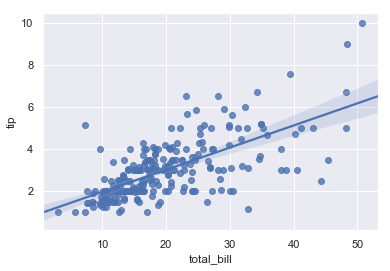

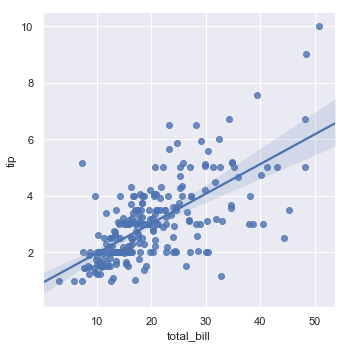

In [57]:
# regplot() and lmplot() - main functions for linear relationships
# very similar but regplot accepts variety of data formats
# while lmplot only strings; also difference in figure shape
sns.regplot(x='total_bill', y='tip', data=tips) # axes-level functin
sns.lmplot(x='total_bill', y='tip', data=tips) # figure-level function

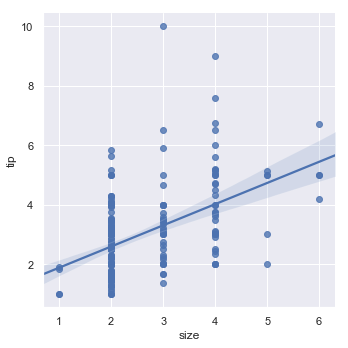

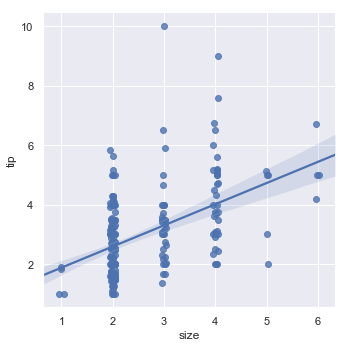

In [23]:
# possible also for discrete data one of variable but....
sns.lmplot(x='size', y='tip', data=tips)
# to help it a little is taking jitter parameter
sns.lmplot(x='size', y='tip', data=tips, x_jitter=.05);

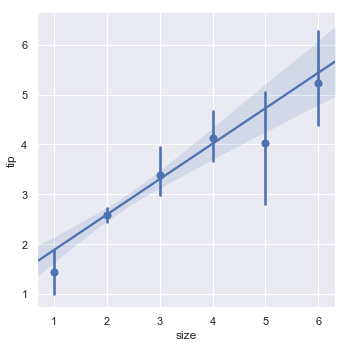

In [24]:
# a second option to problem above is to plot an estimate
# of central tendency along with a confidence interval
sns.lmplot(x='size', y='tip', data=tips, x_estimator=np.mean);

<h4>Fitting different kinds of models</h4>

In [25]:
# an example of 'anscombe data' to show that linear regression
# is not always useful for some kinds of datasets
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


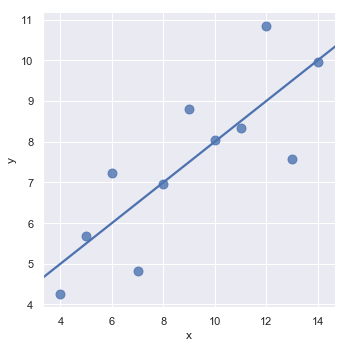

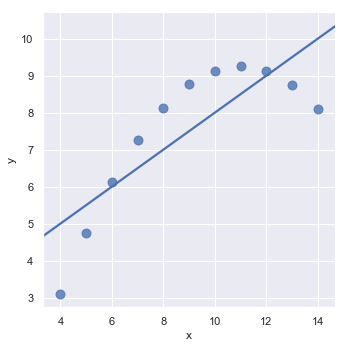

In [26]:
# also linear relationships are the same but the second
# plot shows that it is not a good model(data has 
# 'higher-order relationship' like polynomial)
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='I'"),
          ci=None, scatter_kws={'s': 80})
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='II'"),
           ci=None, scatter_kws={'s': 80});

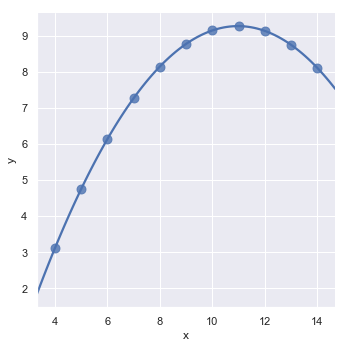

In [27]:
# polynomial regression model for nonlinear trends in datasets
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='II'"),
          order=2, ci=None, scatter_kws={'s':80});

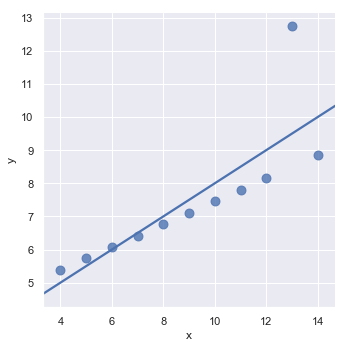

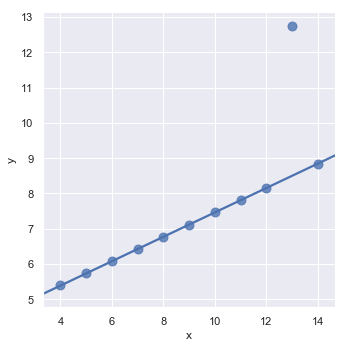

In [28]:
import statsmodels # necessary for the robust option
# another problem are 'outlier' observations deviating
# the main relationship 
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='III'"),
          ci=None, scatter_kws={'s': 80})

# for outliers useful is a robust regression(which uses
# a different loss function to downweight relatively large residual)
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='III'"),
           robust=True, ci=None, scatter_kws={'s': 80});

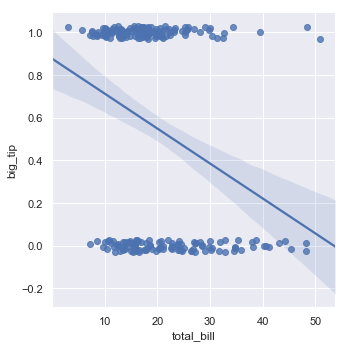

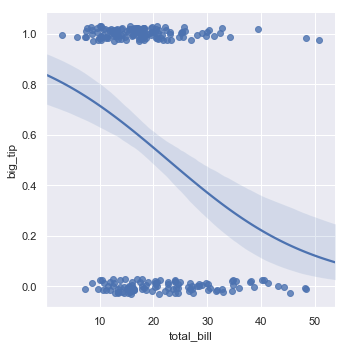

In [29]:
# another problems cause datasets where y is binary
tips['big_tip'] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x='total_bill', y='big_tip', data=tips,
           y_jitter=.03)
# the solution is to fit a logistic regression, such that
# regression line shows the estimated probability of y=1
# for a given value of x
sns.lmplot(x='total_bill', y='big_tip', data=tips,
          logistic=True, y_jitter=.03); # turning off 'ci'
# parameter will speed the computations

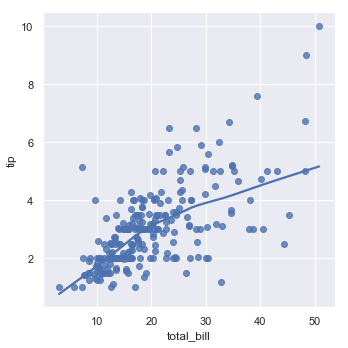

In [38]:
# an altogether different approach to fit nonparametric regression
# lowess stands for "locally weighted scatterplot smoothing"

sns.lmplot(x='total_bill', y='tip', data=tips, lowess=True);

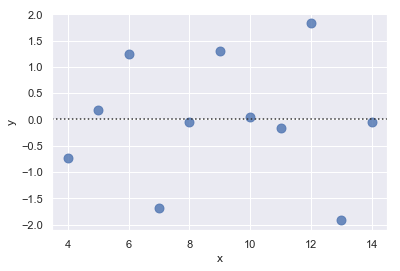

In [46]:
# using residplot() functon for checking whether the simple regression model is appropriate for a datase
# after removing simple linear regression (data observations) residual values are plotted - should be randomly
# scattered around y=0

sns.residplot(x='x', y='y', data=anscombe.query("dataset=='I'"),
             scatter_kws={'s': 80});


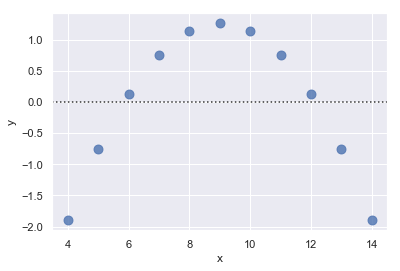

In [45]:
# if there is structure in residuals it suggests that simple linear regression is not appropriate
sns.residplot(x='x', y='y', data=anscombe.query("dataset=='II'"),
             scatter_kws={'s': 80});

<h4>Conditioning on other variables</h4>

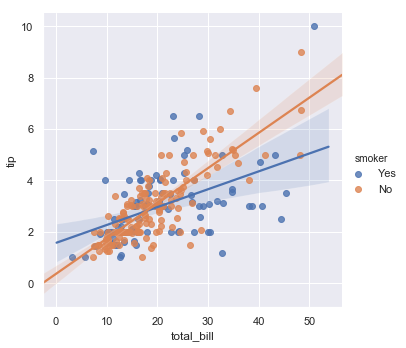

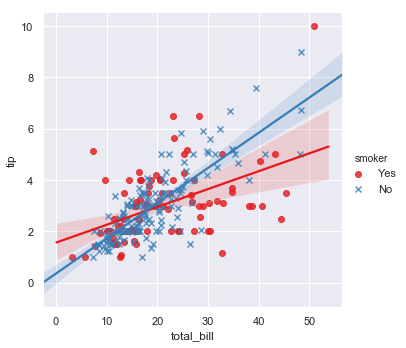

In [53]:
# using lmplot()(but not regplot) allows to explore relationships
# with additional categorical variables
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)
sns.lmplot(x='total_bill', y='tip',hue='smoker', data=tips,
          markers=['o', 'x'], palette='Set1')

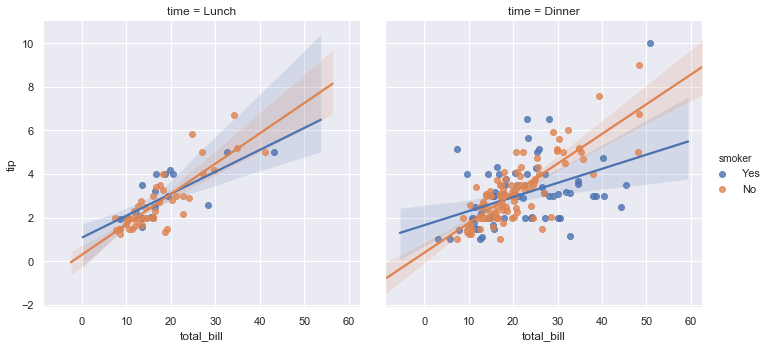

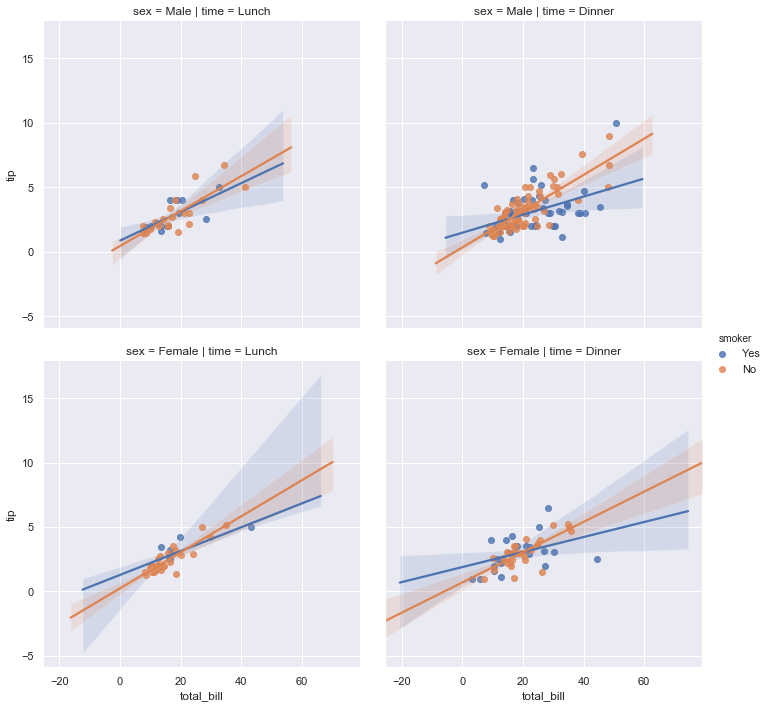

In [55]:
# to add another variable you can draw multiple 'facets'
sns.lmplot(x='total_bill', y='tip', hue='smoker',
          col='time', data=tips)
sns.lmplot(x='total_bill', y='tip', hue='smoker',
          col='time', row='sex', data=tips);

<h4>Controlling the size and shape of the plot

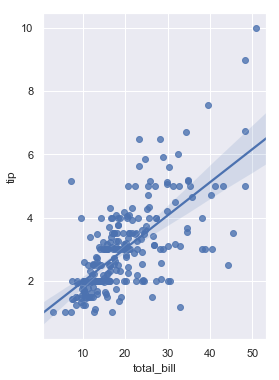

In [69]:
# to control the size you need to create a figure object
f, ax = plt.subplots(figsize=(4,6))
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax);

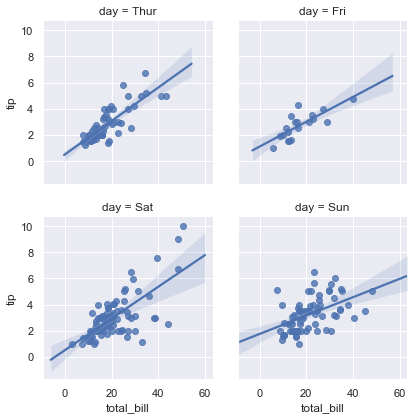

In [76]:
# lmplot() figure is controlled through the FaceGrid interface,
# which apply to each facet in the plot, not the overall figure
sns.lmplot(x='total_bill', y='tip', col='day', data=tips,
           col_wrap=2, height=3);

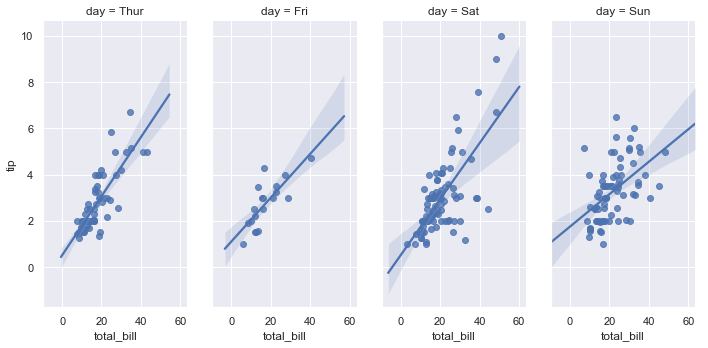

In [81]:
sns.lmplot(x='total_bill', y='tip', col='day', data=tips,
          aspect=.5);

<h4>Plotting a regression in other contexts</h4>

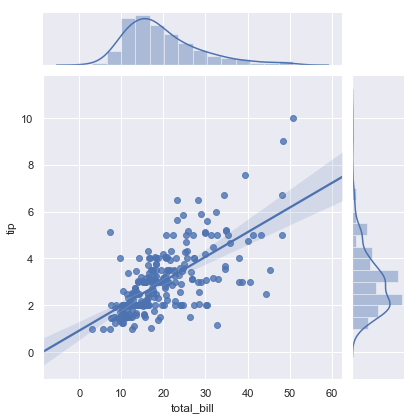

In [82]:
# jointplot() function as a way of visualizing bivariate distribution
# can also use regplot() to show the linear regression fit
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

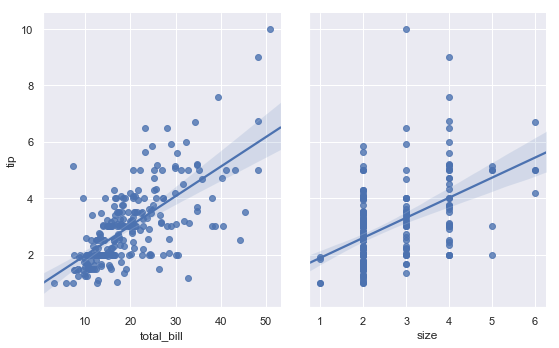

In [83]:
# pairplot() function with kind='reg' combines regplot() with PairGrid
# to show the linear relationship between variables in datatset
sns.pairplot(tips, x_vars=['total_bill', 'size'],
            y_vars=['tip'], height=5, aspect=.8, kind='reg');

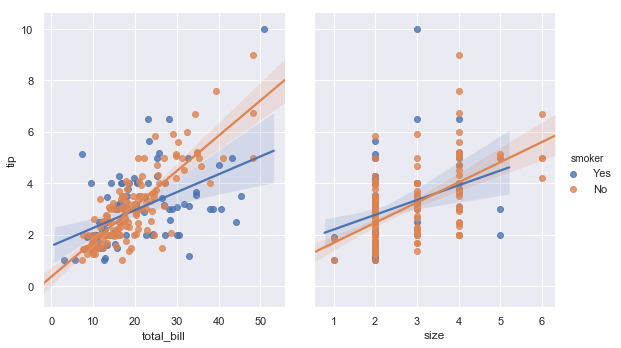

In [84]:
# like lmplot(), but unlike jointplot(), conditioning on an
# additional variable is built into pairplot using hue parameter
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'],
             hue='smoker', height=5, aspect=.8, kind='reg');